Capstone Project

In [ ]:
#pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


Reading in the first .csv file

In [5]:
df_prices = pd.read_csv('../data/car_prices.csv')

Exploring the first .csv file a little

In [6]:
df_prices.columns

Index(['year', 'make', 'model', 'trim', 'body', 'transmission', 'vin', 'state',
       'condition', 'odometer', 'color', 'interior', 'seller', 'mmr',
       'sellingprice', 'saledate'],
      dtype='object')

In [7]:
df_prices.shape

(558837, 16)

In [8]:
df_prices.dtypes

year              int64
make             object
model            object
trim             object
body             object
transmission     object
vin              object
state            object
condition       float64
odometer        float64
color            object
interior         object
seller           object
mmr             float64
sellingprice    float64
saledate         object
dtype: object

In [9]:
df_prices.describe()

,year,condition,odometer,mmr,sellingprice
count,558837.000000,547017.000000,558743.000000,558799.000000,558825.000000
mean,2010.038927,30.672365,68320.017767,13769.377495,13611.358810
std,3.966864,13.402832,53398.542821,9679.967174,9749.501628
min,1982.000000,1.000000,1.000000,25.000000,1.000000
25%,2007.000000,23.000000,28371.000000,7100.000000,6900.000000
50%,2012.000000,35.000000,52254.000000,12250.000000,12100.000000
75%,2013.000000,42.000000,99109.000000,18300.000000,18200.000000
max,2015.000000,49.000000,999999.000000,182000.000000,230000.000000


Checking to see how many null values are in the first .csv file

In [10]:
print(df_prices.isnull().sum())

year                0
make            10301
model           10399
trim            10651
body            13195
transmission    65352
vin                 4
state               0
condition       11820
odometer           94
color             749
interior          749
seller              0
mmr                38
sellingprice       12
saledate           12
dtype: int64


In [11]:
print(df_prices.isnull().sum())

year                0
make            10301
model           10399
trim            10651
body            13195
transmission    65352
vin                 4
state               0
condition       11820
odometer           94
color             749
interior          749
seller              0
mmr                38
sellingprice       12
saledate           12
dtype: int64


Removing null values

In [12]:
df_prices_cleaned = df_prices.dropna()


Confirming null values were dropped

In [13]:
print(df_prices_cleaned.isnull().sum())

year            0
make            0
model           0
trim            0
body            0
transmission    0
vin             0
state           0
condition       0
odometer        0
color           0
interior        0
seller          0
mmr             0
sellingprice    0
saledate        0
dtype: int64


In [14]:
df_prices_cleaned.columns

Index(['year', 'make', 'model', 'trim', 'body', 'transmission', 'vin', 'state',
       'condition', 'odometer', 'color', 'interior', 'seller', 'mmr',
       'sellingprice', 'saledate'],
      dtype='object')

Removing columns that aren't pertinent to the analysis

In [15]:
df_prices_cleaned = df_prices_cleaned.drop(columns = ['condition', 'odometer', 'color', 'interior', 'seller', 'saledate'])

Confirming that the unnecessary columns were dropped

In [16]:
df_prices_cleaned.columns

Index(['year', 'make', 'model', 'trim', 'body', 'transmission', 'vin', 'state',
       'mmr', 'sellingprice'],
      dtype='object')

Checking to see what are the unique values listed in the body column, as this is the column that will be used to join to the next table. Converting the values to lower case and removing the spaces to get rid of duplicate body types.

In [17]:
body_values = df_prices_cleaned['body']
print(body_values.unique())

['SUV' 'Sedan' 'Convertible' 'Coupe' 'Wagon' 'Hatchback' 'Crew Cab'
 'G Coupe' 'G Sedan' 'Elantra Coupe' 'Genesis Coupe' 'Minivan' 'Van'
 'Double Cab' 'CrewMax Cab' 'Access Cab' 'King Cab' 'CTS Coupe'
 'SuperCrew' 'E-Series Van' 'Extended Cab' 'SuperCab' 'G Convertible'
 'Koup' 'Regular Cab' 'Quad Cab' 'CTS-V Coupe' 'sedan' 'G37 Convertible'
 'Club Cab' 'Xtracab' 'Q60 Convertible' 'CTS Wagon' 'G37 Coupe' 'Mega Cab'
 'Cab Plus 4' 'Q60 Coupe' 'Beetle Convertible' 'TSX Sport Wagon'
 'Promaster Cargo Van' 'Cab Plus' 'GranTurismo Convertible' 'CTS-V Wagon'
 'Ram Van' 'convertible' 'minivan' 'Transit Van' 'van' 'regular-cab' 'suv'
 'g sedan' 'g coupe' 'hatchback' 'king cab' 'supercrew' 'g convertible'
 'coupe' 'crew cab' 'wagon' 'e-series van' 'regular cab' 'quad cab'
 'g37 convertible' 'supercab' 'extended cab' 'crewmax cab' 'double cab'
 'genesis coupe' 'access cab' 'mega cab' 'xtracab' 'beetle convertible'
 'cts coupe' 'koup' 'club cab' 'elantra coupe' 'q60 coupe' 'cts-v coupe'
 'transit 

Defining a function to clean up the body column, classifying each 'body' value into one of three categories and creating a column to store those categories. Coupe keeps getting classified as 'Other' for some reason.

In [18]:
def body_classification(body):
    if body in ['Sedan', 'Convertible', 'CTS-V Coupe', 'Coupe', 'Wagon', 'Hatchback', 'G Coupe', 'G Sedan', 'Elantra Coupe', 'Genesis Coupe', 'CTS Coupe', 'G Convertible', 'Koup', 'CTS-V Coupe', 'G37 Convertible', 'Q60 Convertible', 'CTS Wagon', 'G37 Coupe', 'Q60 Coupe', 'Beetle Convertible', 'TSX Sport Wagon', 'GranTurismo Convertible', 'CTS-V Wagon', 'sedan', 'convertible', 'coupe', 'wagon', 'hatchback', 'g coupe', 'g sedan', 'elantra coupe', 'genesis coupe', 'cts coupe', 'g convertible', 'koup', 'cts-v coupe', 'g37 convertible', 'q60 convertible', 'cts wagon', 'g37 coupe', 'q60 coupe', 'beetle convertible', 'tsx sport wagon', 'granturismo convertible', 'cts-v wagon']:
        return 'Passenger Cars'
    elif body in ['SUV', 'Transit Van', 'Crew Cab', 'Minivan', 'Van', 'Double Cab', 'CrewMax Cab', 'Access Cab', 'King Cab', 'SuperCrew', 'E-Series Van', 'Extended Cab', 'SuperCab', 'Regular Cab', 'Quad Cab', 'Club Cab', 'Xtracab', 'Mega Cab', 'Cab Plus 4', 'Promaster Cargo Van', 'Cab Plus', 'Ram Van', 'suv', 'crew cab', 'minivan', 'van', 'double cab', 'crewmax cab', 'access cab', 'king cab', 'supercrew', 'e-series van', 'extended cab', 'supercab', 'regular cab', 'quad cab', 'club cab', 'xtracab', 'mega cab', 'cab plus 4', 'promaster cargo van', 'cab plus', 'ram van', 'transit van', 'regular-cab']:
        return 'Light Trucks'
    else:
        return 'Other'

df_prices_cleaned['body_class'] = df_prices_cleaned['body'].apply(body_classification)

df_prices_cleaned.head

<bound method NDFrame.head of         year    make                model         trim       body  \
0       2015     Kia              Sorento           LX        SUV   
1       2015     Kia              Sorento           LX        SUV   
2       2014     BMW             3 Series   328i SULEV      Sedan   
3       2015   Volvo                  S60           T5      Sedan   
4       2014     BMW  6 Series Gran Coupe         650i      Sedan   
...      ...     ...                  ...          ...        ...   
558831  2011     BMW             5 Series         528i      Sedan   
558833  2012     Ram                 2500  Power Wagon   Crew Cab   
558834  2012     BMW                   X5    xDrive35d        SUV   
558835  2015  Nissan               Altima        2.5 S      sedan   
558836  2014    Ford                F-150          XLT  SuperCrew   

       transmission                vin state      mmr  sellingprice  \
0         automatic  5xyktca69fg566472    ca  20500.0       21500.0   

Determining the average sale price by year

In [24]:
avg_saleprice = df_prices_cleaned.groupby('year')['sellingprice'].mean().reset_index()
avg_saleprice.columns = ['year', 'avg_saleprice'] 

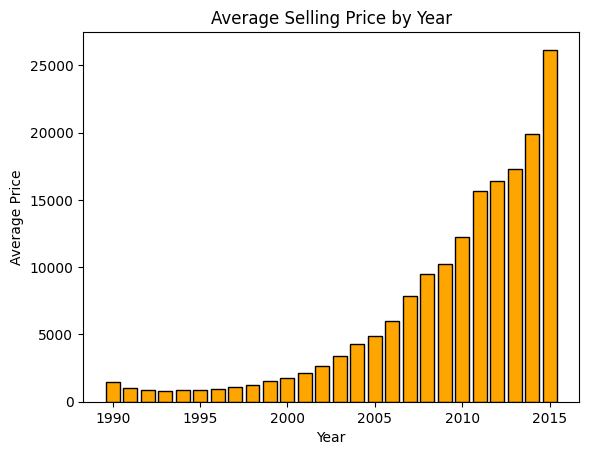

In [32]:
plt.bar(avg_saleprice['year'], avg_saleprice['avg_saleprice'], color = 'orange', edgecolor = 'black')
plt.title('Average Selling Price by Year')
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.show()

Figuring out how many of each make of vehicle was sold over the period represented in the dataframe.

In [42]:
total_manufac = df_prices_cleaned['make'].value_counts().reset_index()
print(total_manufac)

             make  count
0            Ford  81013
1       Chevrolet  54150
2          Nissan  44043
3          Toyota  35313
4           Dodge  27181
5           Honda  24781
6         Hyundai  18659
7             BMW  17509
8             Kia  15828
9        Chrysler  15133
10       Infiniti  14011
11  Mercedes-Benz  14008
12           Jeep  12735
13     Volkswagen  10780
14          Lexus  10409
15            GMC   9217
16          Mazda   6930
17       Cadillac   6315
18        Lincoln   4926
19           Audi   4802
20          Acura   4503
21          Buick   4470
22         Subaru   4369
23            Ram   4044
24        Pontiac   4018
25     Mitsubishi   3661
26          Volvo   3082
27           MINI   2946
28         Saturn   2570
29        Mercury   1571
30          Scion   1545
31     Land Rover   1322
32         Jaguar   1257
33        Porsche   1157
34         Suzuki    977
35         HUMMER    768
36           FIAT    725
37           Saab    416
38          smart    343


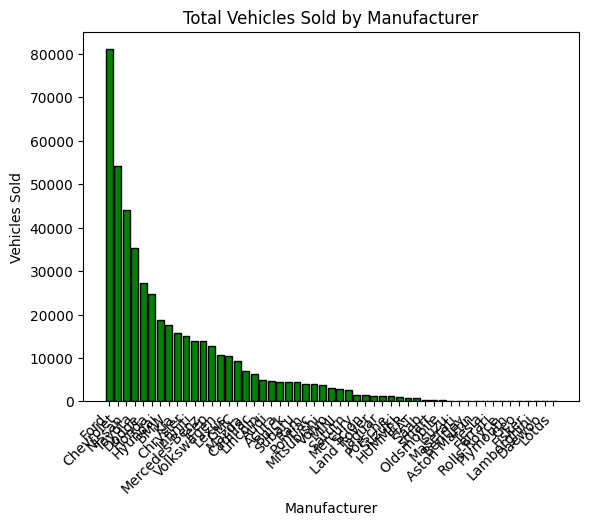

In [50]:
plt.bar(total_manufac['make'], total_manufac['count'], color = 'green', edgecolor = 'black')
plt.title('Total Vehicles Sold by Manufacturer')
plt.xlabel('Manufacturer')
plt.ylabel('Vehicles Sold')
plt.xticks(rotation=45, ha='right')
plt.show()

Comparing the two vehicle clases that are in the dataframe to see which type sold the most, and making a donut pie chart because it looks like a wheel.

In [55]:
trucks_vs_cars = df_prices_cleaned['body_class'].value_counts()
print(trucks_vs_cars)

body_class
Passenger Cars    284228
Light Trucks      188097
Name: count, dtype: int64


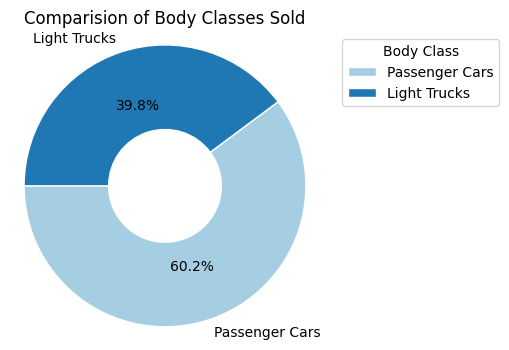

In [59]:
values = trucks_vs_cars.values
labels = trucks_vs_cars.index

plt.figure(figsize=(4,4))
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=180, colors=plt.cm.Paired.colors, wedgeprops={'width':0.6, 'edgecolor':'white'})
plt.legend(title = 'Body Class', bbox_to_anchor=(1.05,1), loc='best')
plt.title('Comparision of Body Classes Sold')
plt.axis('equal')
plt.show()

Exporting the finished dataframe as a .csv file

In [20]:
#df_prices_cleaned.to_csv('../data/car_prices_updated.csv', index=False)

In [21]:
#df_prices_filtered = df_prices_cleaned[df_prices_cleaned['year']>2019]
#df_prices_filtered.head

In [22]:
#df_fatal = pd.read_csv('../data/fatal_crashes_combined.csv')

In [23]:
#df_fatal.columns